In [20]:
import tensorflow as tf

tf.__version__

'2.9.1'

In [21]:
import tensorflow as tf
import config
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import classification_report


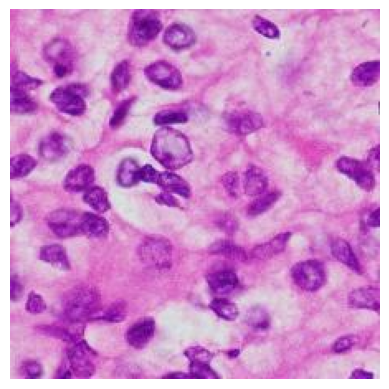

In [22]:
image_path = "1.jpg"

# Read the image
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

In [23]:
# Load the trained Keras model
model = tf.keras.models.load_model(config.model_dir)

In [24]:
def test_single_image(img_dir, model):
    img_raw = tf.io.read_file(img_dir)
    img_tensor = tf.image.decode_jpeg(img_raw, channels=config.channels)
    img_tensor = tf.image.resize(img_tensor, [config.image_height, config.image_width])

    img_numpy = img_tensor.numpy()
    img_numpy = np.expand_dims(img_numpy, 0)
    img_tensor = tf.convert_to_tensor(img_numpy, tf.float32)

    # Normalize the image
    img = img_tensor / 255.0
    
    # Apply the model to get predictions
    prob = model.predict(img)
    classification = np.argmax(prob)

    return classification

In [25]:
# Define the path to the test image
test_image_path = '1.jpg'

In [26]:
# Get the classification for the test image
classification = test_single_image(test_image_path, model)
# Print the classification
print(f'Predicted class: {classification}')


1/1 [==============================] - 3s 3s/step
Predicted class: 4
